## Generating Sensitivity Matrix (SSM) for BioCRNpyler CRN model
This notebook uses the bioscrape toolbox and the sensitivity analysis included in the toolbox. <br>
This notebook is used to plot and save the sensitivity matrix for the model without deg-tag. <br>
Created two separate files so that they can be run in parallel as the estimation of sensitivity matrix can be computationally expensive depending on the simulation step size. <br>
More information on how to use the bioscrape's sensitivity analysis tool can be found at: <br> https://github.com/biocircuits/bioscrape/blob/master/examples/Sensitivity%20Analysis%20using%20Bioscrape.ipynb

In [1]:
## Import all the libraries 

from bioscrape.types import Model
from bioscrape.simulator import py_simulate_model
from bioscrape.analysis import py_get_jacobian, py_get_sensitivity_to_parameter
from bioscrape.analysis import py_sensitivity_analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from matplotlib import style
%config InlineBackend.figure_format = 'retina'

style.use("default")

%matplotlib inline

In [2]:
## Import the BioCRNpyler model to be analyzed 

model_degtag = Model(sbml_filename = 'SBML_model_files/Biocrnpyler_model_degtag_050525.xml')
model_no_tag = Model(sbml_filename = 'SBML_model_files/Biocrnpyler_model_no_degtag_050525.xml')

N_steps = 720*40 # 28800 points
#N_steps = 100
t_final = 720
timepoints = np.linspace(0, t_final, N_steps)

tf_I = int(N_steps * 1) # Indice to represent 720 minutes in the simulation
tf_i = 72 # Indice to represent 720 minutes in the experimental data 

In [3]:
# Deifning the initial conditions for the CRN which were hand fitted 

model_degtag.set_species({'dna_sfYFP': 100,
 'protein_sigma_machinery': 135,
 'protein_holoenzyme_machinery': 0,
 'protein_NT_nucleotide': 942,
 'protein_AA_aminoacid': 85610,
 'protein_RNAase_machinery': 90,
 'protein_unfolded_protein_degtag': 0,
 'rna_T_sfYFP':0,
 'protein_sfYFP':0,
 'cell_count_count': 6666666.67})


model_no_tag.set_species({'dna_sfYFP': 100,
 'protein_sigma_machinery': 135,
 'protein_holoenzyme_machinery': 0,
 'protein_NT_nucleotide': 942,
 'protein_AA_aminoacid': 85610,
 'protein_RNAase_machinery': 90,
 'protein_unfolded_protein_degtag': 0,
 'rna_T_sfYFP':0,
 'protein_sfYFP':0,
 'cell_count_count': 6666666.67})

In [4]:
## Simulate the model using bioscrape to visualize the model 

sol_deg = py_simulate_model(timepoints = timepoints, Model = model_degtag)
sol_no_deg = py_simulate_model(timepoints = timepoints, Model = model_no_tag)

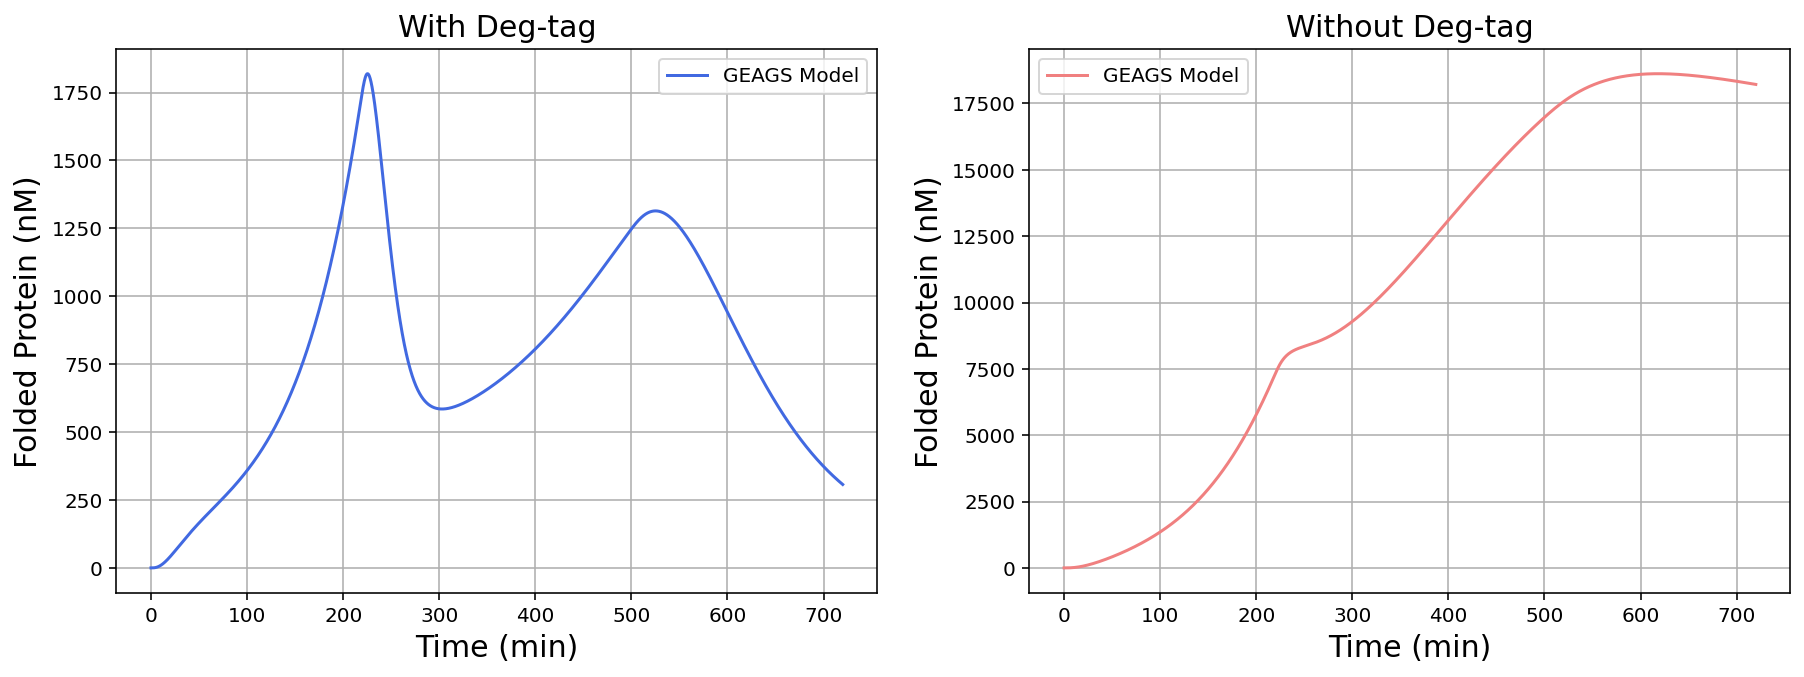

In [5]:
## Plotting the model output for sanity check 

fig, ax = plt.subplots(1,2, figsize = (15,5))
fig.subplots_adjust(wspace = 0.2)#, hspace = 0.1)


i = 0
ax[i].plot(timepoints[:tf_I], sol_deg['protein_sfYFP'][:tf_I], label = "GEAGS Model", color = 'royalblue')
ax[i].set_xlabel('Time (min)', fontsize = 15) ; ax[i].set_ylabel('Folded Protein (nM)', fontsize = 15) 
ax[i].set_title('With Deg-tag', fontsize = 15) ; ax[i].grid(True) ; ax[i].legend()

i = 1
ax[i].plot(timepoints[:tf_I], sol_no_deg['protein_sfYFP'][:tf_I], label = "GEAGS Model", color = 'lightcoral')
ax[i].set_xlabel('Time (min)', fontsize = 15) ; ax[i].set_ylabel('Folded Protein (nM)', fontsize = 15) 
ax[i].set_title('Without Deg-tag', fontsize = 15) ; ax[i].grid(True) ; ax[i].legend()


In [6]:
## Run sensitivity analysis 
## Use the normalize = True argument to normalize the sensitivity matrix
## Pass the argument params to only consider specific parameters

## Supress ODEint or RunTime warnings
warnings.filterwarnings("ignore")

params = ['k_tx_1b__bacterial_transcription',
 'k_tx_1u__bacterial_transcription',
 'RNAP_max__bacterial_transcription',
 'c_max__logistic_cell_growth',
 'k_tx_2b__bacterial_transcription',
 'k_tx_2u__bacterial_transcription',
 'b_tx_4u__mrna_degradation',
 'k_tx_3__bacterial_transcription',
 'k_tl_1b__bacterial_translation',
 'k_tl_1u__bacterial_translation',
 'Et_max__bacterial_translation',
 'k_tl_2b__bacterial_translation',
 'tRNA_max__bacterial_translation',
 'k_tl_3b__bacterial_translation',
 'k_tl_3u__bacterial_translation',
 'Ribo_max__bacterial_translation',
 'k_tl_4__bacterial_translation',
 'k_tl_5__bacterial_translation',
 'b_tl_5__bacterial_translation',
 'k_tl_8__bacterial_translation',
 'k_tl_10__bacterial_translation',
 'k__logistic_cell_growth',
 'k_tx_4b__mrna_degradation',
 'k_tx_4u__mrna_degradation',
 'k_tx_5__mrna_degradation',
 'k_tl_7__non_tag_degradation']

SSM_no_tag = py_sensitivity_analysis(model_no_tag, timepoints, normalize = True,
                                   params = params, h0 = 1e-3)

In [7]:
# Set of codes to obtain information regarding the size of the SSM matrix, names of species and their indices to print the appropriate data

# a = model_degtag.get_parameter_values() # To see how many parameters are there in the analysis 
# Np = len(a)
a = params # To see how many parameters are there in the analysis 
Np = len(a)
np.shape(a), Np

((26,), 26)

In [8]:
# To visualize the names of all the species in the model 

model_no_tag.get_species_list()

['dna_sfYFP',
 'protein_sigma_machinery',
 'protein_holoenzyme_machinery',
 'protein_NT_nucleotide',
 'rna_T_sfYFP',
 'complex_dna_sfYFP_protein_holoenzyme_machinery_',
 'protein_AA_aminoacid',
 'protein_sfYFP',
 'protein_unfolded_protein_degtag',
 'protein_peptide_chain_peptide',
 'protein_Ct_machinery',
 'protein_Caa_machinery',
 'protein_Ctic_machinery',
 'protein_C_deg_unfolded_machinery',
 'protein_C_deg_folded_machinery',
 'protein_RNAase_machinery',
 'cell_count_count',
 'complex_dna_sfYFP_protein_holoenzyme_machinery_open_',
 'complex_protein_RNAase_machinery_rna_T_sfYFP_']

In [9]:
# To obtain the indice of protein species 

i_protein = model_no_tag.get_species_list().index('protein_sfYFP')
i_protein 

7

In [10]:
# To visualize the order of the parameters appearing in the sensitivity matrix

model_no_tag.get_parameter_dictionary()

{'k_tx_1b__bacterial_transcription': 0.05061,
 'k_tx_1u__bacterial_transcription': 14.081,
 'RNAP_max__bacterial_transcription': 1960.0,
 'n_gamma_RNAP__bacterial_transcription': 0.23,
 'c_max__logistic_cell_growth': 503666666.666667,
 'k_tx_2b__bacterial_transcription': 0.0019382,
 'k_tx_2u__bacterial_transcription': 0.09999,
 'b_tx_4u__mrna_degradation': 1.0,
 'n_delta__bacterial_transcription': 5.5,
 'k_tx_3__bacterial_transcription': 0.003597,
 'k_tl_1b__bacterial_translation': 0.002793,
 'k_tl_1u__bacterial_translation': 11.48224,
 'Et_max__bacterial_translation': 1090.0,
 'n_gamma_Et__bacterial_translation': 0.37,
 'k_tl_2b__bacterial_translation': 8.24109,
 'k_tl_2u__bacterial_translation': 35.1135,
 'tRNA_max__bacterial_translation': 1535.0,
 'n_gamma_tRNA__bacterial_translation': 0.6,
 'k_tl_3b__bacterial_translation': 0.04287,
 'k_tl_3u__bacterial_translation': 12.3438,
 'Ribo_max__bacterial_translation': 280.0,
 'n_gamma_Ribo__bacterial_translation': 0.67,
 'k_tl_4__bacteria

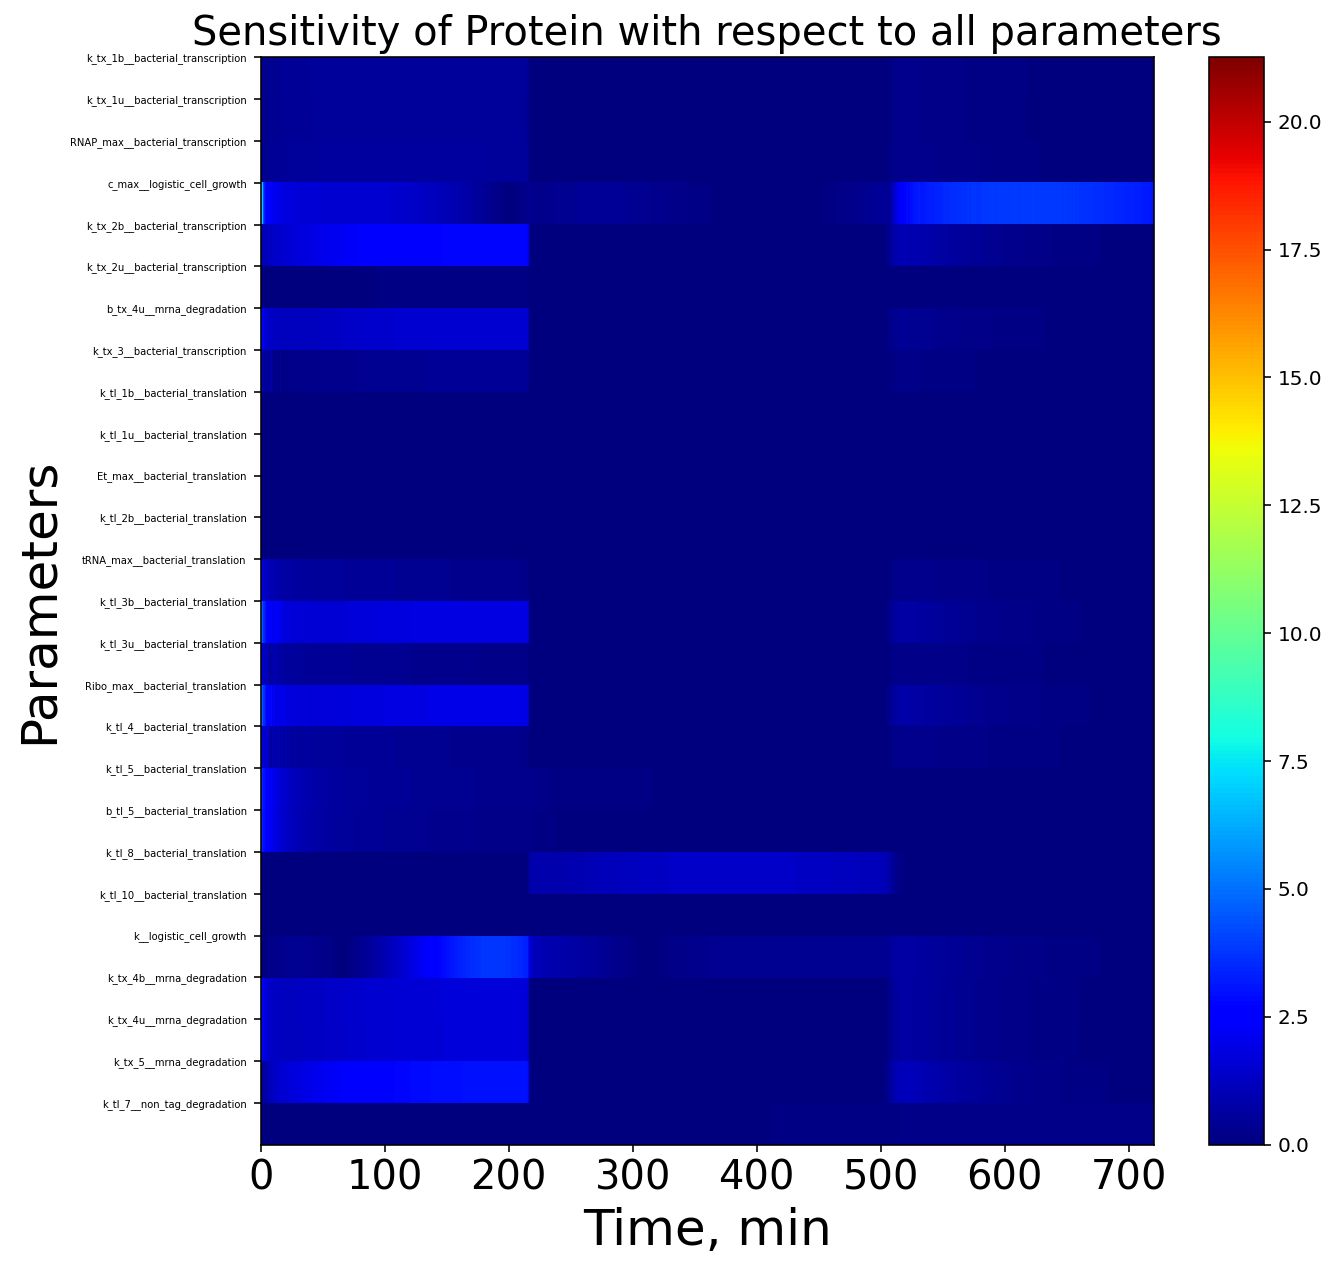

In [11]:
## Plotting the sensitivity matrix for the Protein species
## Plotting the absolute values of the sensitivity matrixc coefficients 

fig, axs = plt.subplots(1,1, figsize = (10,10), sharex = 'col')
h00 = axs.imshow(np.abs(SSM_no_tag[:,:,i_protein].T), cmap = 'jet', interpolation = 'nearest', aspect = 'auto', extent = [0,t_final,Np,0])
fig.colorbar(h00, ax = axs)
axs.set_ylabel('Parameters', fontsize = 25) ; axs.set_xlabel('Time, min', fontsize = 25)
#axs.yticks(list(model_degtag.get_parameter_dictionary().keys()), fontsize = 5)
axs.set_title('Sensitivity of Protein with respect to all parameters', fontsize = 20)
plt.xticks(fontsize = 20)
# y_ticks = list(model_no_tag.get_parameter_dictionary().keys())
y_ticks = params
plt.yticks(range(len(y_ticks)), y_ticks, rotation='horizontal', fontsize = 5);

In [12]:
# # Saving the data and exporting it for further analysis 

# np.save("simulation_data/SSM_no_tag_abs_050725.npy", np.abs(SSM_no_tag))